# Rajavel's House Price Prediction

In [1]:
import numpy as np #Importing the numpy library for numerical computations
import pandas as pd #Importing the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt #Importing the matplotlib library for plotting graphs
import seaborn as sns #Importing the seaborn library for enhanced data visualization
from sklearn.model_selection import train_test_split #Importing the train_test_split function from sklearn.model_selection module
from sklearn.preprocessing import MinMaxScaler #Import the MinMaxScaler from sklearn.preprocessing module
from sklearn.linear_model import LinearRegression #Importing the LinearRegression model from scikit-learn
from sklearn.metrics import r2_score #Importing the r2_score function from the sklearn.metrics module
from sklearn.preprocessing import StandardScaler, PolynomialFeatures #Importing the Standard Scaler, Polynomial Features from sklearn.preprocessing module
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge #Importing the LinearRegression, Lasso, Ridge, bayesianridge from scikit-model
from sklearn.pipeline import Pipeline #Importing the Pipeline from sklearn.pipeline module
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error #Importing the error modules from sklearn.metrics module
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict #Importing the predictors model from sklearn.model_selection
from sklearn.feature_extraction import DictVectorizer #Importing the DictVectorizer from sklearn.feature_extraction module
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder #Importing the encoder models from sklearn.preprocessing module
%matplotlib inline

# Importing the dataset

In [2]:
data = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# Understanding The Data

In [4]:
# Shape the data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (20640, 10)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
data.describe(include ='all') # To show statistical summary of the columns of our data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


# To check the Null Value

In [8]:
# To count the null values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Performing EDA

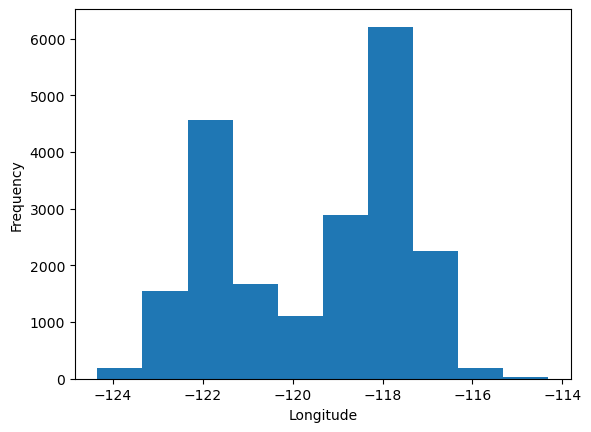

In [9]:
# Histogram plot
plt.hist(data['longitude'])
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

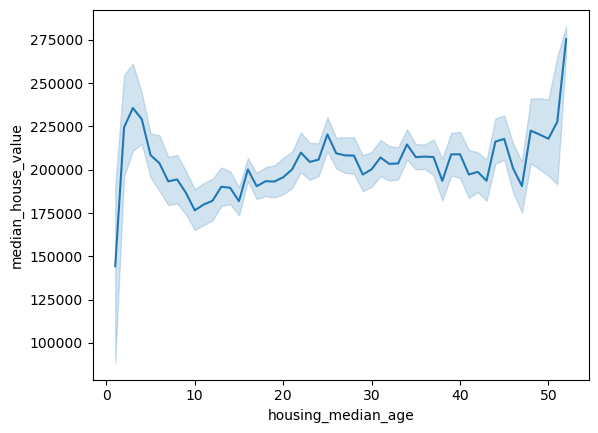

In [10]:
sns.lineplot(x = "housing_median_age", y = "median_house_value", data = data)

In [11]:
data.nunique() # Number of unique values

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

<Axes: xlabel='ocean_proximity'>

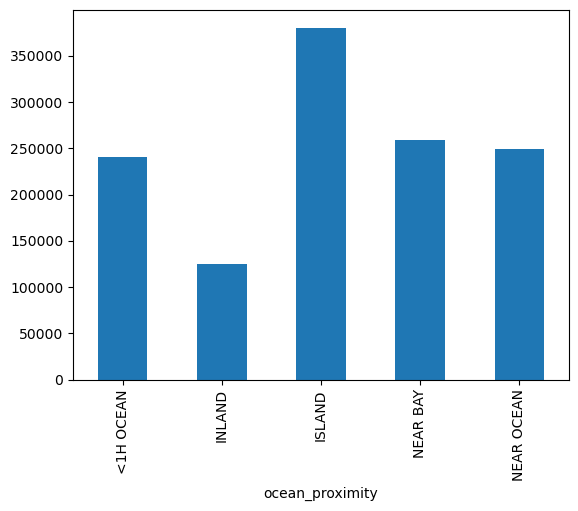

In [12]:
data.groupby("ocean_proximity")['median_house_value'].mean().plot.bar()

<Axes: xlabel='median_house_value', ylabel='Count'>

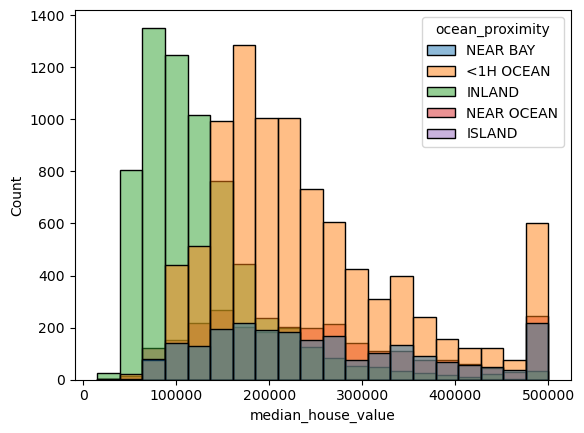

In [13]:
sns.histplot(data=data, x="median_house_value", hue = "ocean_proximity", bins=20)

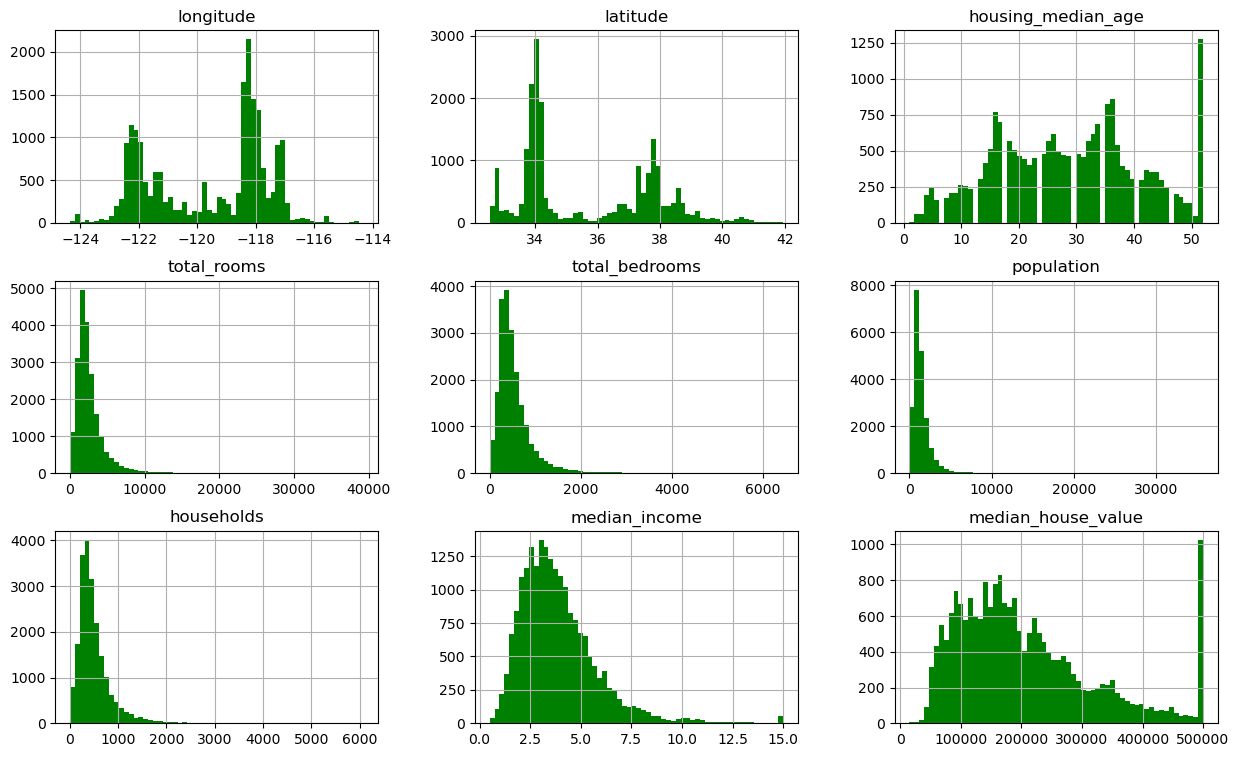

In [14]:
data.hist(bins=60, figsize=(15,9),color="green")
plt.show()

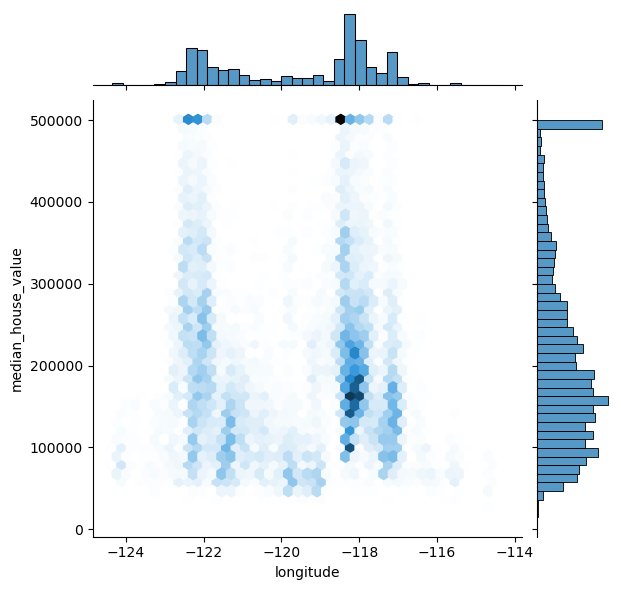

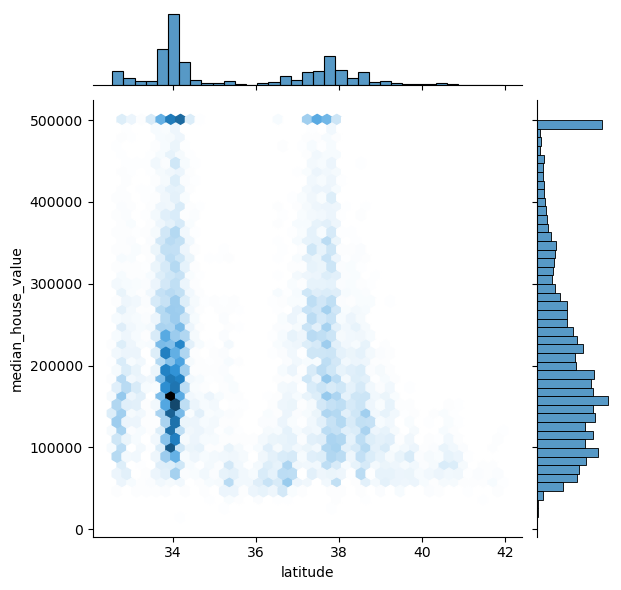

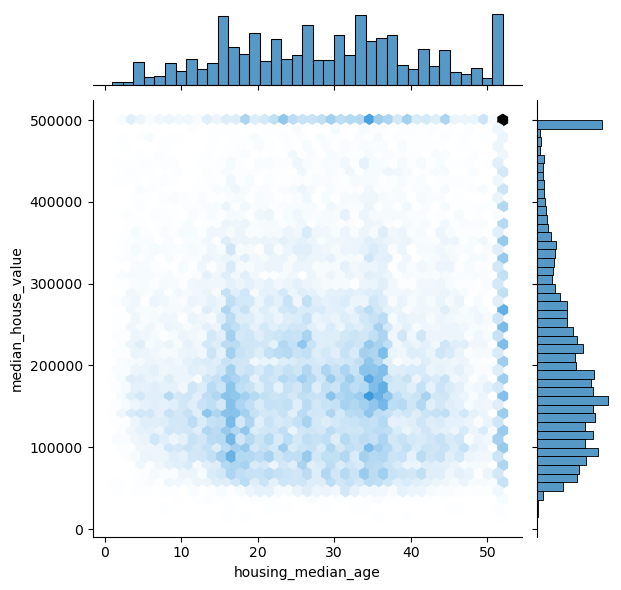

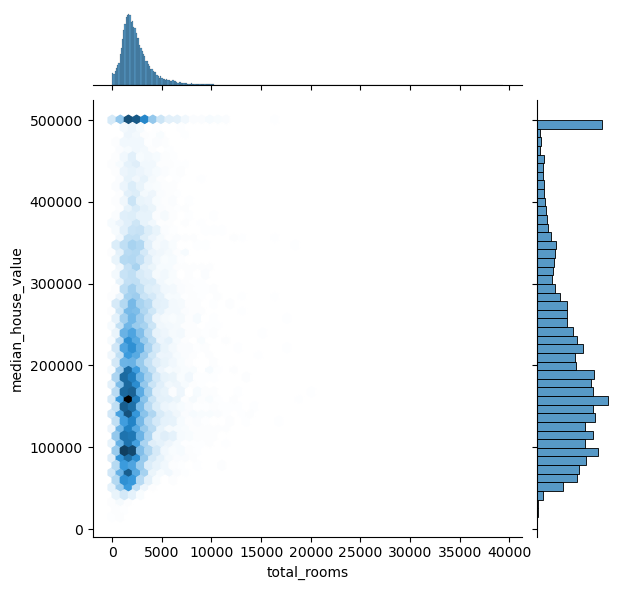

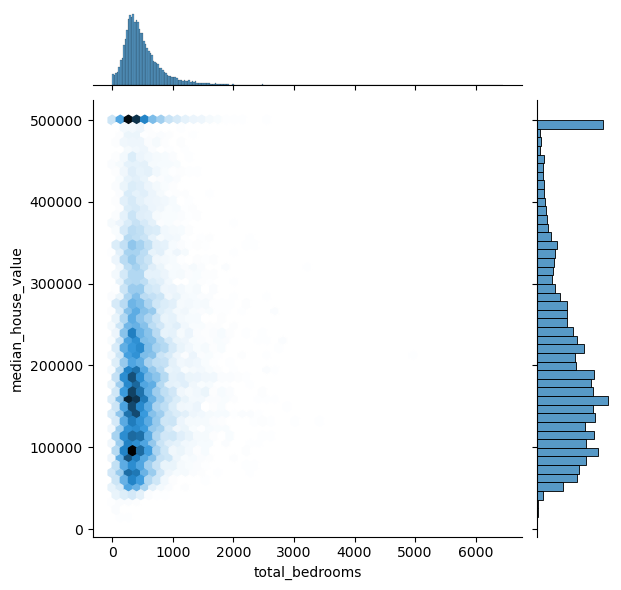

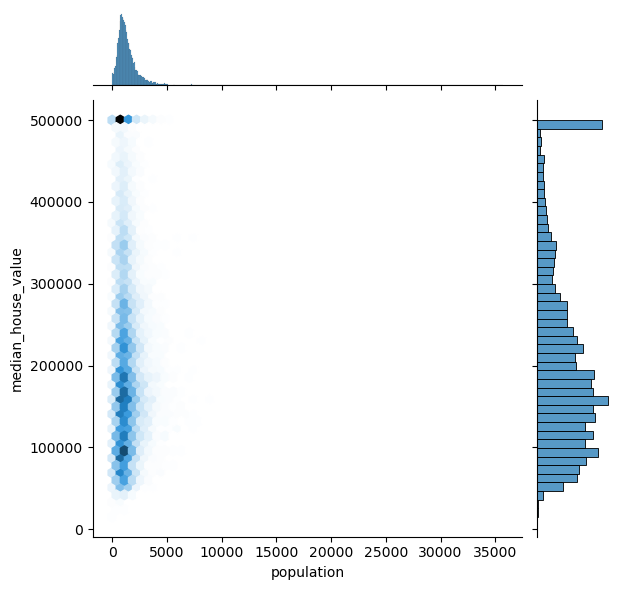

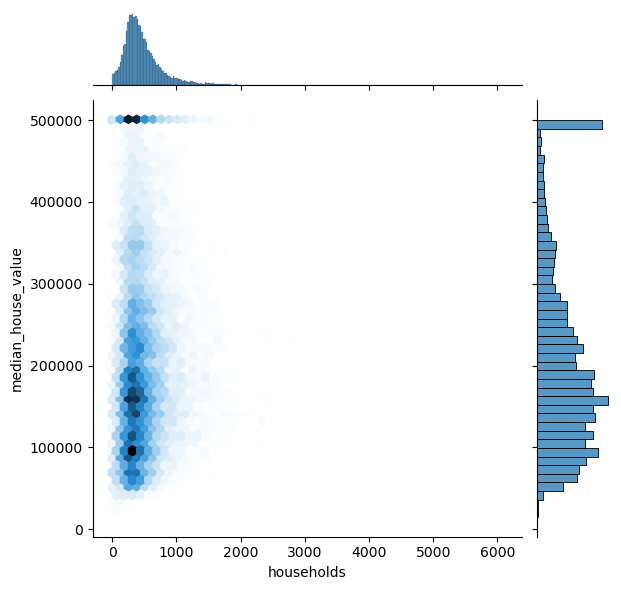

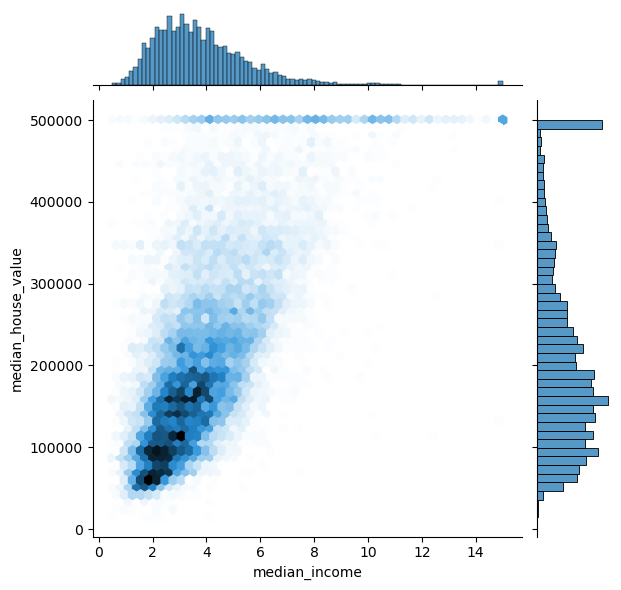

In [15]:
for col in list(data.columns):
    if(col != "ocean_proximity" and col != "median_house_value"):
        sns.jointplot(x = col,  y = "median_house_value",kind = "hex", data = data) #scatterplot with two marginal histogram
        plt.show()

<Axes: xlabel='median_income', ylabel='count'>

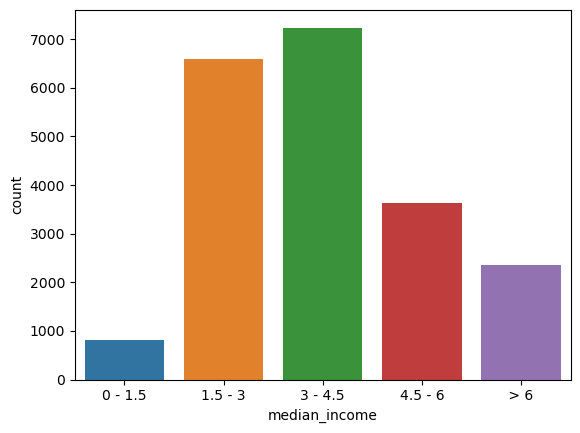

In [16]:
income_bins = pd.cut(data["median_income"],
                     bins=[0,1.5,3,4.5,6,np.inf], 
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])
sns.countplot(x = income_bins)

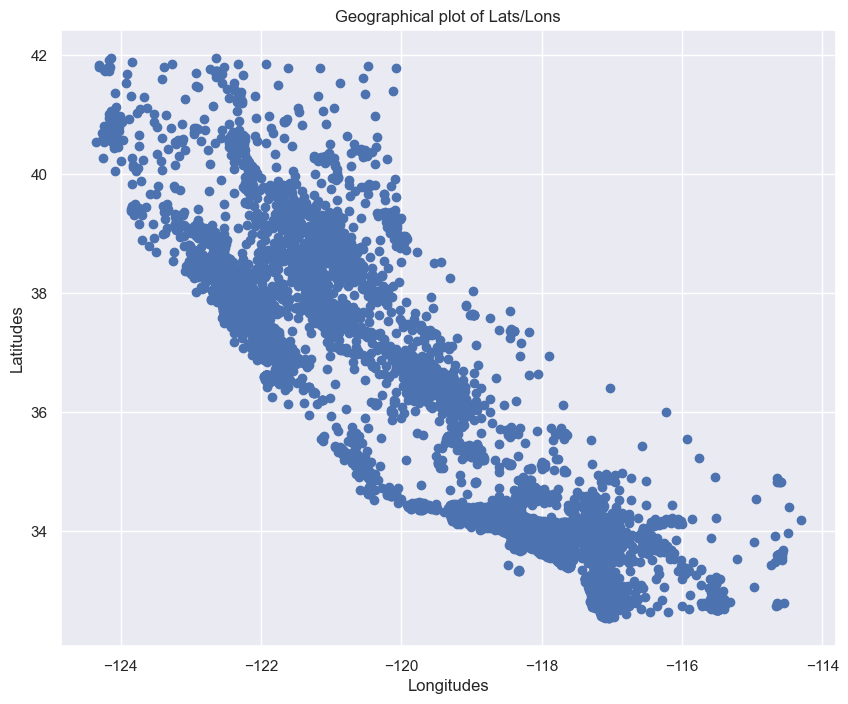

In [17]:
sns.set()
plt.figure(figsize=(10,8))#Figure size
plt.scatter('longitude','latitude',data=data)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

<Figure size 1000x700 with 0 Axes>

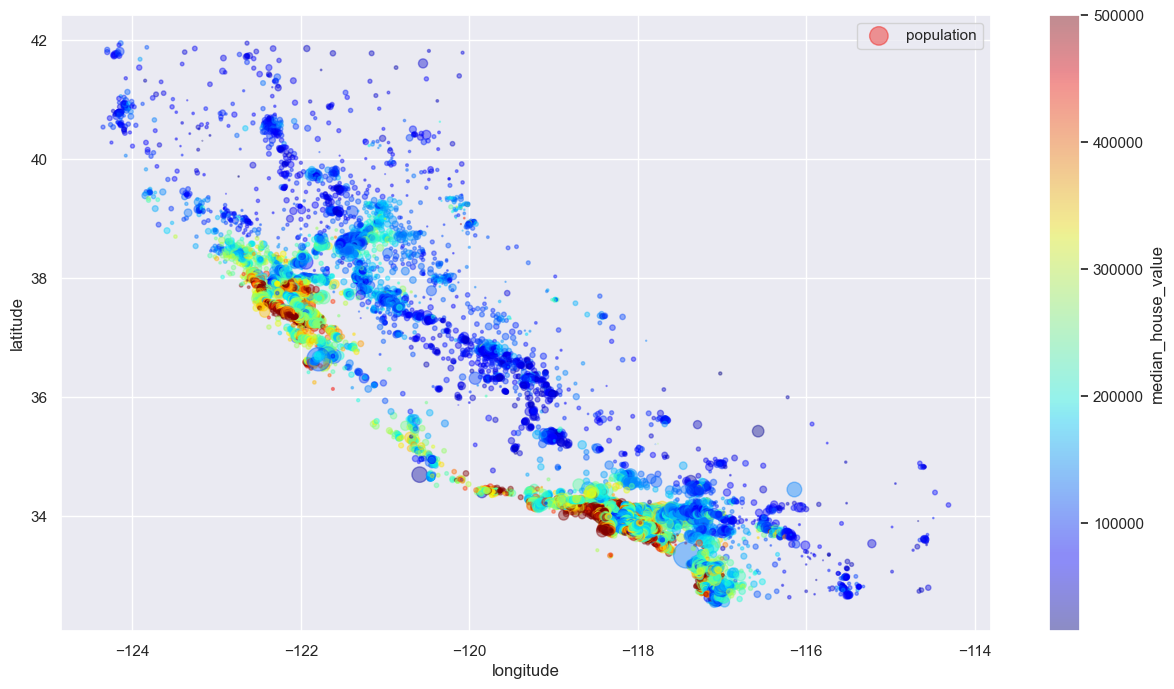

In [18]:
plt.figure(figsize=(10,7))
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

# Handling Missing Value

In [19]:
data.isna().sum() #we have 207 missing values in total_bedrooms column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
data.total_rooms.describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

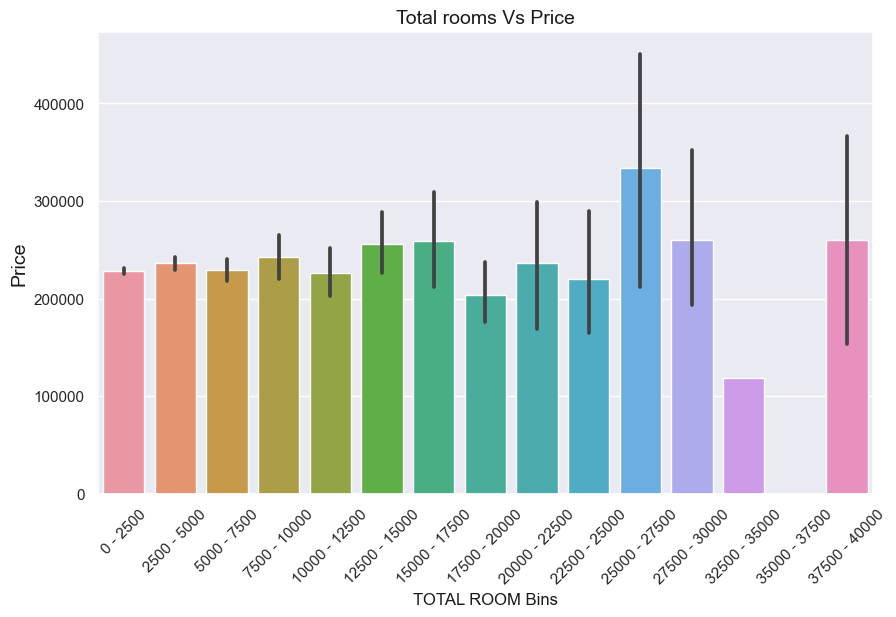

In [21]:
room_bins = pd.cut(data["total_rooms"],
                     bins=[2500,5000,7500, 10000, 12500, 15000, 17500, 20000,22500,25000,27500,30000,32500,35000,37500,40000],
                     labels=["0 - 2500","2500 - 5000", "5000 - 7500", "7500 - 10000", 
                             "10000 - 12500", "12500 - 15000", "15000 - 17500", 
                             "17500 - 20000", "20000 - 22500", "22500 - 25000",
                             "25000 - 27500", "27500 - 30000", "32500 - 35000", 
                             "35000 - 37500", "37500 - 40000"]) #need to segment and sort data values into the bins
# sns.countplot(x = room_bins)
plt.figure(figsize=(10,6)) 
sns.barplot(x=room_bins, y = data['median_house_value']) 
plt.title('Total rooms Vs Price', fontsize=14, c='k') 
plt.xlabel('TOTAL ROOM Bins', fontsize=12, c='k') 
plt.xticks(rotation = 45)
plt.ylabel('Price', fontsize=14,c='k') 
plt.show() 

In [22]:
total_rooms_dict = {}
for i in room_bins.unique()[1:room_bins.nunique()]:
    start = int(i.split(" - ")[0])
    end = int(i.split(" - ")[1])
    ff = data[(data['total_rooms']>start) & (data['total_rooms']<end)]
    set_mean = int(ff.total_bedrooms.mean())
    total_rooms_dict[i] = set_mean
total_rooms_dict

{'2500 - 5000': 681,
 '0 - 2500': 332,
 '10000 - 12500': 2010,
 '15000 - 17500': 2862,
 '5000 - 7500': 1185,
 '12500 - 15000': 2515,
 '7500 - 10000': 1617,
 '25000 - 27500': 4302,
 '17500 - 20000': 3171,
 '27500 - 30000': 4356,
 '20000 - 22500': 3699,
 '22500 - 25000': 4308,
 '32500 - 35000': 6445}

In [23]:
room_bins

0                NaN
1        2500 - 5000
2                NaN
3                NaN
4                NaN
            ...     
20635            NaN
20636            NaN
20637            NaN
20638            NaN
20639       0 - 2500
Name: total_rooms, Length: 20640, dtype: category
Categories (15, object): ['0 - 2500' < '2500 - 5000' < '5000 - 7500' < '7500 - 10000' ... '27500 - 30000' < '32500 - 35000' < '35000 - 37500' < '37500 - 40000']

In [24]:
ff = data[(data['total_rooms']>37500)]
set_mean = int(ff.total_bedrooms.mean())
total_rooms_dict["37500 - 40000"] = set_mean
total_rooms_dict

{'2500 - 5000': 681,
 '0 - 2500': 332,
 '10000 - 12500': 2010,
 '15000 - 17500': 2862,
 '5000 - 7500': 1185,
 '12500 - 15000': 2515,
 '7500 - 10000': 1617,
 '25000 - 27500': 4302,
 '17500 - 20000': 3171,
 '27500 - 30000': 4356,
 '20000 - 22500': 3699,
 '22500 - 25000': 4308,
 '32500 - 35000': 6445,
 '37500 - 40000': 5840}

In [25]:
data.total_bedrooms.fillna(-1, inplace = True) #replaces the NULL values with a specified value
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
data.at[290,"total_rooms"] #To locating the dataset

1256.0

In [27]:
data.isna().sum() #ALL null values are gone

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6076\929368499.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


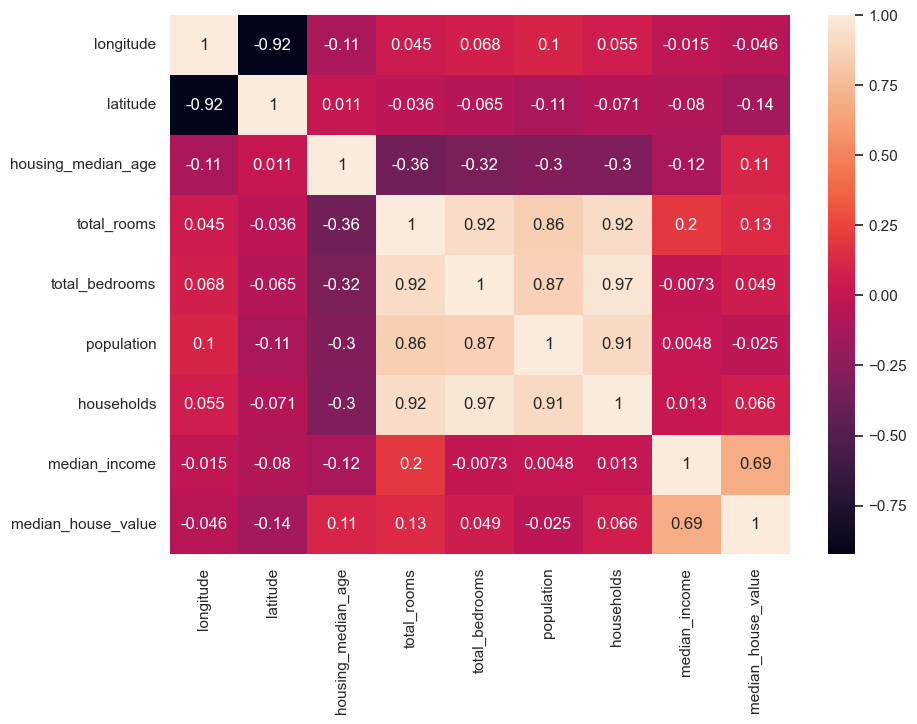

In [28]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

# Encoding

In [29]:
data.ocean_proximity.unique() #Here will replace "ocean_proximity" values with sensible int values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [30]:
data.ocean_proximity = data.ocean_proximity.replace({'NEAR BAY': 1,
                                   '<1H OCEAN': 3,
                                   'NEAR OCEAN': 2,
                                    'ISLAND' : 4,
                                    'INLAND':0 })
data.ocean_proximity

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: ocean_proximity, Length: 20640, dtype: int64

# Data Splitting

In [31]:
x = data.drop('median_house_value', axis = 1)
y = data['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [32]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0


# K-Fold & Cross Validation

In [33]:
#split the input data into k subsets of data (also known as folds)
kf = KFold(shuffle=True, random_state=42, n_splits=5) 

# Denotions
s = StandardScaler()
lr = LinearRegression()
lo = Lasso()
ri = Ridge()
br = BayesianRidge(verbose=False)

In [34]:
estimator = Pipeline([("scaler", s),
                      ("BayesianRidge", ri)]) # the end-to-end construct that orchestrates the flow of data into, and output from, a machine learning

predic= cross_val_predict(estimator, x, y, cv=kf)

In [35]:
# statistical measure that represents the goodness of fit of a regression model
r2_score(y, predic)

0.6366083092257925

In [36]:
mean_absolute_error(y,predic)

50584.14847888613